# Practice Session: Palmer Penguins dataset

In the section, we will practice the steps learned so far on a new dataset: the
Palmer Penguins dataset.

<img alt="penguins" src="https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/lter_penguins.png" width=500 />

*Artwork by @allison_horst*

Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php)
and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of
the [Long Term Ecological Research Network](https://lternet.edu/).

Data are available by  [CC-0](https://creativecommons.org/share-your-work/public-domain/cc0/)
license in accordance with the [Palmer Station LTER Data Policy](http://pal.lternet.edu/data/policies)
and the [LTER Data Access Policy for Type I data](https://lternet.edu/data-access-policy/).

Here we will use a subset of it, prepared for this exercise.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Loading and visualizing the dataset

In [2]:
from penguins import load_penguins

First, using the `load_penguins` function, load the data set and explore it.

As you do it, answer the following questions:

- how many features does it contain?
- how many samples?
- what is the target variable and how is it encoded?

*Note: more information about the culmen measures are available [here](https://allisonhorst.github.io/palmerpenguins/#bill-dimensions).*

**Hint: this section is very similar to the [Iris data set exploration in section 02.1](02.1-Machine-Learning-Intro.ipynb#Loading-the-Iris-Data-with-Scikit-Learn).**

In [3]:
# load the dataset
penguins = load_penguins()

In [4]:
# check the size of the feature matrix 
penguins.data.shape

(333, 5)

In [5]:
# check the name of the features
penguins.feature_names

array(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex FEMALE'], dtype=object)

In [6]:
# check the target variable
penguins.target

0      0
1      0
2      0
3      0
4      0
      ..
328    1
329    1
330    1
331    1
332    1
Length: 333, dtype: int8

In [7]:
np.unique(penguins.target)

array([0, 1, 2], dtype=int8)

In [8]:
# and its possible values
penguins.target_names

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

Next, let's have a look at the data and see how the different species are
distributed. Create a plot showing two of the dimensions of the dataset.

*Bonus: you can create a function and use it in a loop to show all pairs of dimensions.*

**Hint: this section is very similar to the [Iris data set exploration in section 02.1](02.1-Machine-Learning-Intro.ipynb#Loading-the-Iris-Data-with-Scikit-Learn).**

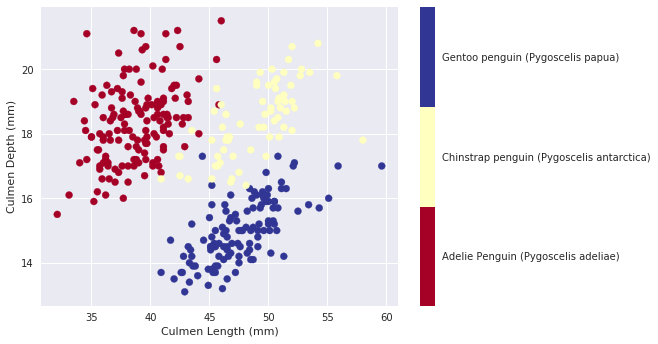

In [9]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: penguins.target_names[int(i)])

plt.scatter(penguins.data[:, x_index], penguins.data[:, y_index],
            c=penguins.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(penguins.feature_names[x_index])
plt.ylabel(penguins.feature_names[y_index]);

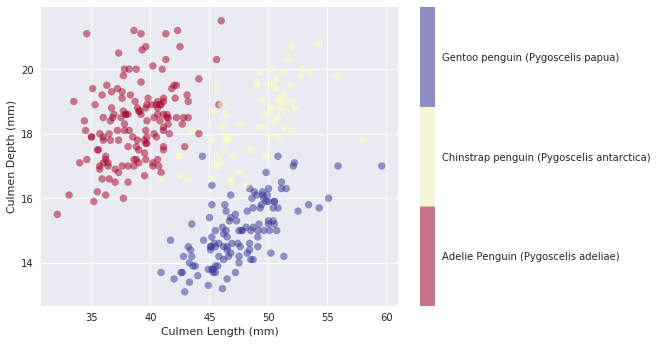

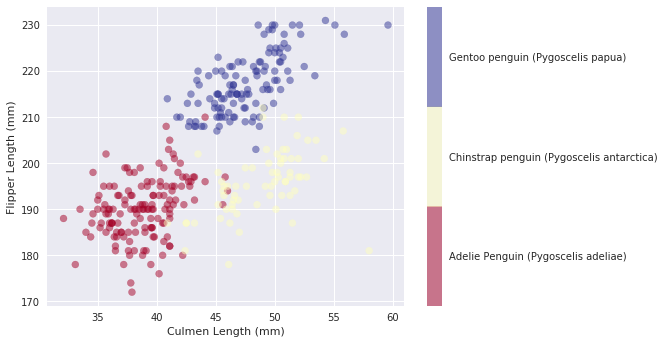

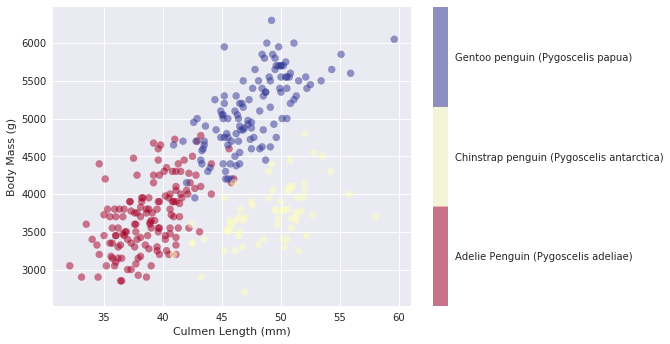

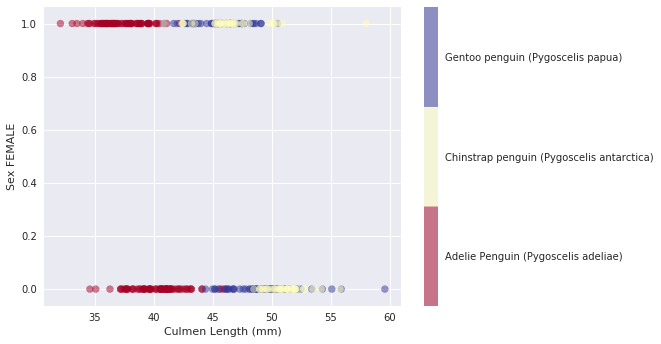

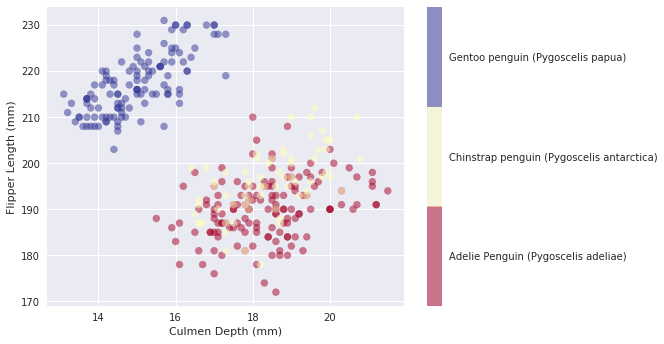

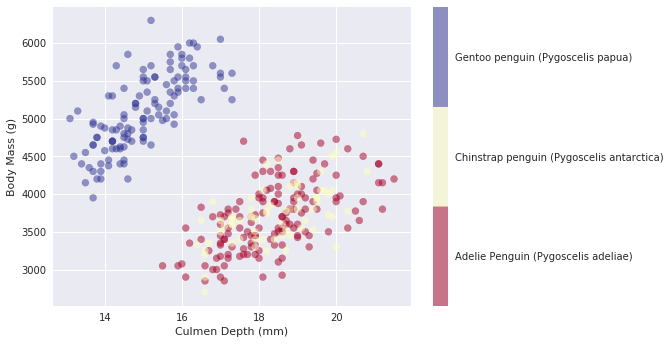

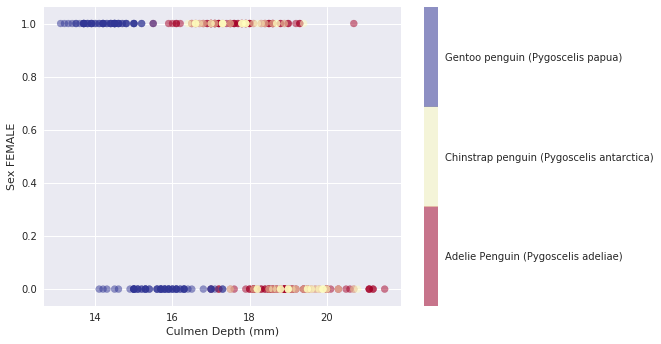

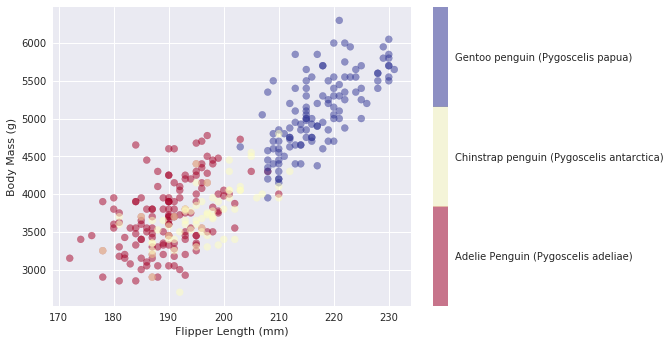

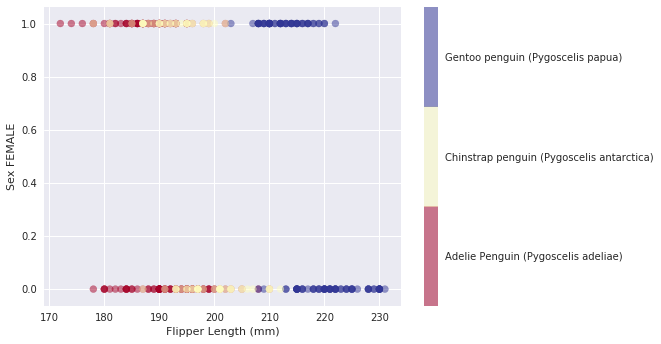

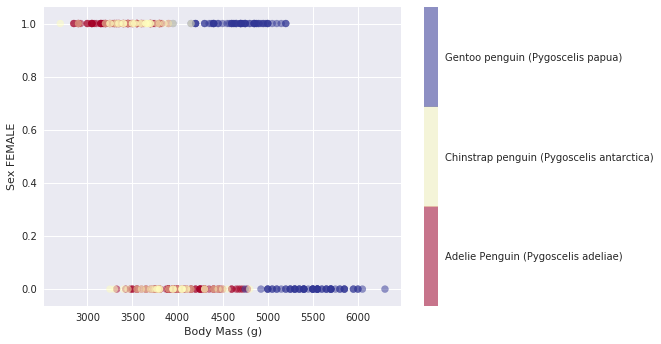

In [10]:
def plot_pair(x_index, y_index):
    plt.figure()
    formatter = plt.FuncFormatter(lambda i, *args: penguins.target_names[int(i)])

    plt.scatter(penguins.data[:, x_index], penguins.data[:, y_index],
                c=penguins.target, cmap=plt.cm.get_cmap('RdYlBu', 3), alpha=0.5)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.clim(-0.5, 2.5)
    plt.xlabel(penguins.feature_names[x_index])
    plt.ylabel(penguins.feature_names[y_index])


n_features = penguins.data.shape[1]
for i in range(n_features):
    for j in range(i + 1, n_features):
        plot_pair(i, j)

### Question

Given the nature of the dataset and the target data, what type of machine learning
task are we trying to achieve (2 keywords)?

## Fit a baseline model: logistic regression

Now that we have loaded and explored the dataset, we can start fitting a first
model and measure its performance.

Let's start with a `LogisticRegression` model, as follows:

1. split the data into a training and test datasets,
2. import the `LogisticRegression` class and create the model,
3. fit the model to the training dataset,
4. generate predictions on the test dataset,
5. compute the accuracy score of the model.

*Bonus: plot the corresponding confusion matrix.*

**Hint: this section is very similar to the [classification on digits example in section 02.2](02.2-Basic-Principles.ipynb#Classification-on-Digits).**

In [11]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(
    penguins.data, penguins.target, random_state=42
)
print(Xtrain.shape, Xtest.shape)

(249, 5) (84, 5)


In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
ypred = model.predict(Xtest)
print(f"{np.sum(ytest == ypred)} / {len(ytest)} correct")

83 / 84 correct


In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, ypred)

0.9880952380952381

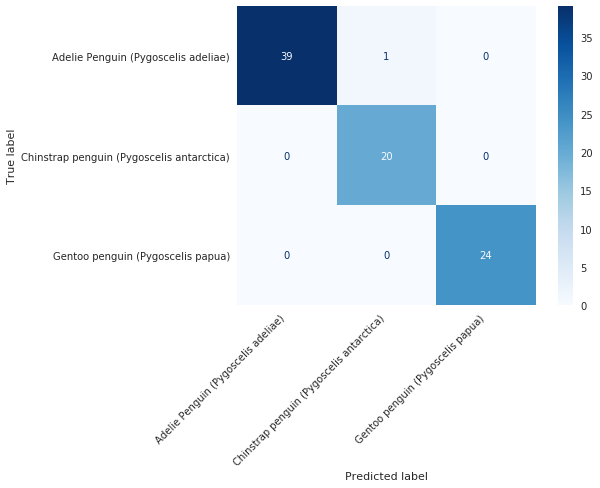

In [15]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, Xtest, ytest, cmap=plt.cm.Blues)
plt.grid(False)
plt.yticks([0, 1, 2], labels=penguins.target_names)
plt.xticks([0, 1, 2], labels=penguins.target_names, rotation=45, ha="right");

To improve the quantification of the model performance, use the `cross_val_score`
function to compute 5 folds cross-validation estimation of the model accuracy.

**Hint: this section is very similar to the [K-fold Cross-Validation in section 05](05-Validation.ipynb#K-fold-Cross-Validation).**

In [16]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(5, shuffle=True, random_state=42)
scores = cross_val_score(model, penguins.data, penguins.target, cv=cv)
print(f"Logistic regression accuracy: {np.mean(scores)} (CV folds: {scores.tolist()})")

Logistic regression accuracy: 0.9879692446856627 (CV folds: [1.0, 0.9850746268656716, 0.9850746268656716, 1.0, 0.9696969696969697])


### Bonus questions

- Use the `make_pipeline` function in combination with the `StandardScaler`
  preprocessor to fit a logistic regression model with input normalization.
- Use the `cross_val_predict` function to generate the confusion matrix for each
  input data points.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000, random_state=42))
scores = cross_val_score(model, penguins.data, penguins.target, cv=cv)
print(f"Logistic regression (with input rescaling) accuracy: {np.mean(scores)} (CV folds: {scores.tolist()})")

Logistic regression (with input rescaling) accuracy: 0.9940298507462686 (CV folds: [0.9850746268656716, 0.9850746268656716, 1.0, 1.0, 1.0])


In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

ypreds = cross_val_predict(model, penguins.data, penguins.target, cv=cv)
print(confusion_matrix(penguins.target, ypreds))

[[146   0   0]
 [  2  66   0]
 [  0   0 119]]


## Fit a random forest model

Now that we have a first linear model fitted, we can explore other models and
compare the cross-validated performances.

Fit a `RandomForestClassifier` and compute its cross-validated accuracy score.

Does it perform better than the logistic regression model?

**Hint: this model has been used a similar way in the [Random Forest for Classifying Digits in section 03.2](03.2-Regression-Forests.ipynb#Example:-Random-Forest-for-Classifying-Digits).**

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200)
model.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
ypred = model.predict(Xtest)
print(f"{np.sum(ytest == ypred)} / {len(ytest)} correct")

81 / 84 correct


In [21]:
accuracy_score(ytest, ypred)

0.9642857142857143

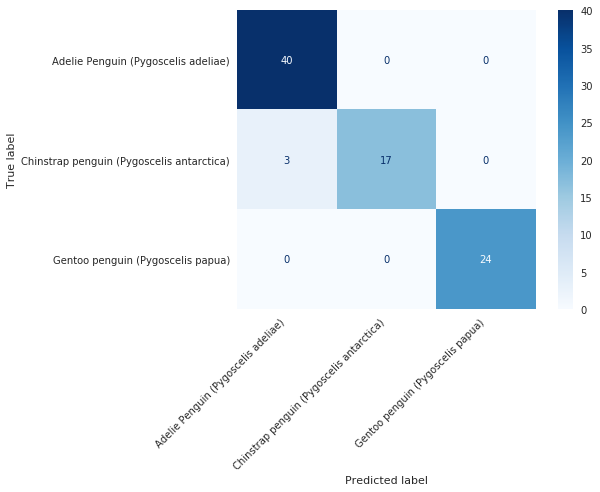

In [22]:
plot_confusion_matrix(model, Xtest, ytest, cmap=plt.cm.Blues)
plt.grid(False)
plt.yticks([0, 1, 2], labels=penguins.target_names)
plt.xticks([0, 1, 2], labels=penguins.target_names, rotation=45, ha="right");

In [23]:
scores = cross_val_score(model, penguins.data, penguins.target, cv=cv)
print(f"Random forest model accuracy: {np.mean(scores)} (CV folds: {scores.tolist()})")

Random forest model accuracy: 0.9759837177747623 (CV folds: [0.9850746268656716, 0.9552238805970149, 0.9850746268656716, 0.9848484848484849, 0.9696969696969697])
